# Credit Risk Model - Classification Problem

In [3]:
# Import the libraries 

import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# Set numbers to two decimal places & NumPy setting that tells Python to suppress scientific notation

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

In [5]:
# import the dataset 

df_customers = pd.read_csv(r"dataset/customers.csv")
df_loans = pd.read_csv(r"dataset/loans.csv")
df_bureau = pd.read_csv(r"dataset/bureau_data.csv")

In [6]:
# Check the first 5 rows from the all three datasets create Dict

datasets = {
          'Customers' : df_customers, 
          'Loans'  : df_loans, 
          'Bureau' : df_bureau

}

In [7]:
# Create forloop to display at once 
for name, df in datasets.items():
    print(f"\n {name} Dataset (Top 5 Rows)")
    display(df.head(5))


 Customers Dataset (Top 5 Rows)


,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001



 Loans Dataset (Top 5 Rows)


,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False



 Bureau Dataset (Top 5 Rows)


,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


In [8]:
## Check the shape of the datasets 

df_customers.shape, df_loans.shape , df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [9]:
# Merge loans and bureau to customers based on keys 

df = pd.merge(df_customers, df_loans, on='cust_id')
df.head(5)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [10]:
df = pd.merge(df,df_bureau,on = 'cust_id')
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,False,4,2,120,0,0,5,10


In [11]:
# Find the column types 
# Show full content in each column
pd.set_option('display.width', 1000)

In [12]:
display(df.dtypes)

cust_id                         object
age                              int64
gender                          object
marital_status                  object
employment_status               object
income                           int64
number_of_dependants             int64
residence_type                  object
years_at_current_address         int64
city                            object
state                           object
zipcode                          int64
loan_id                         object
loan_purpose                    object
loan_type                       object
sanction_amount                  int64
loan_amount                      int64
processing_fee                 float64
gst                              int64
net_disbursement                 int64
loan_tenure_months               int64
principal_outstanding            int64
bank_balance_at_application      int64
disbursal_date                  object
installment_start_dt            object
default                  

In [13]:
#Convert the default target variables to int

df['default']=df['default'].astype(int)
df['default'].value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

## Train & Test Split
-Highlighting Data Leakage concept

In [14]:
X = df.drop("default", axis=1)
y = df['default']

X_train,X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)

In [15]:
# Create train & test datasets

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [16]:
## Check shape of df_train and df_test 

df_train.shape , df_test.shape

((37500, 33), (12500, 33))

# Data Cleaning

In [17]:
df_train.isna().sum()# Drop the rows with missing

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [18]:
# Check the mode of residence_type to fill na to train set

df_train['residence_type'] = df_train['residence_type'].fillna(df_train['residence_type'].mode()[0])

In [19]:
df_train.isnull().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [20]:
# Check the mode of residence_type to fill na to test set

df_test['residence_type'] = df_test['residence_type'].fillna(df_test['residence_type'].mode()[0])


### Conduct EDA on train dataset

In [21]:
# For numeric columns (both int and float)
numeric_cols_train = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# For object or categorical columns
categorical_cols_train = df_train.select_dtypes(include='object').columns.tolist()

In [22]:
numeric_cols_train

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'zipcode',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio',
 'default']

In [23]:
categorical_cols_train

['cust_id',
 'gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_id',
 'loan_purpose',
 'loan_type',
 'disbursal_date',
 'installment_start_dt']

### Box Plot to see the outliers 

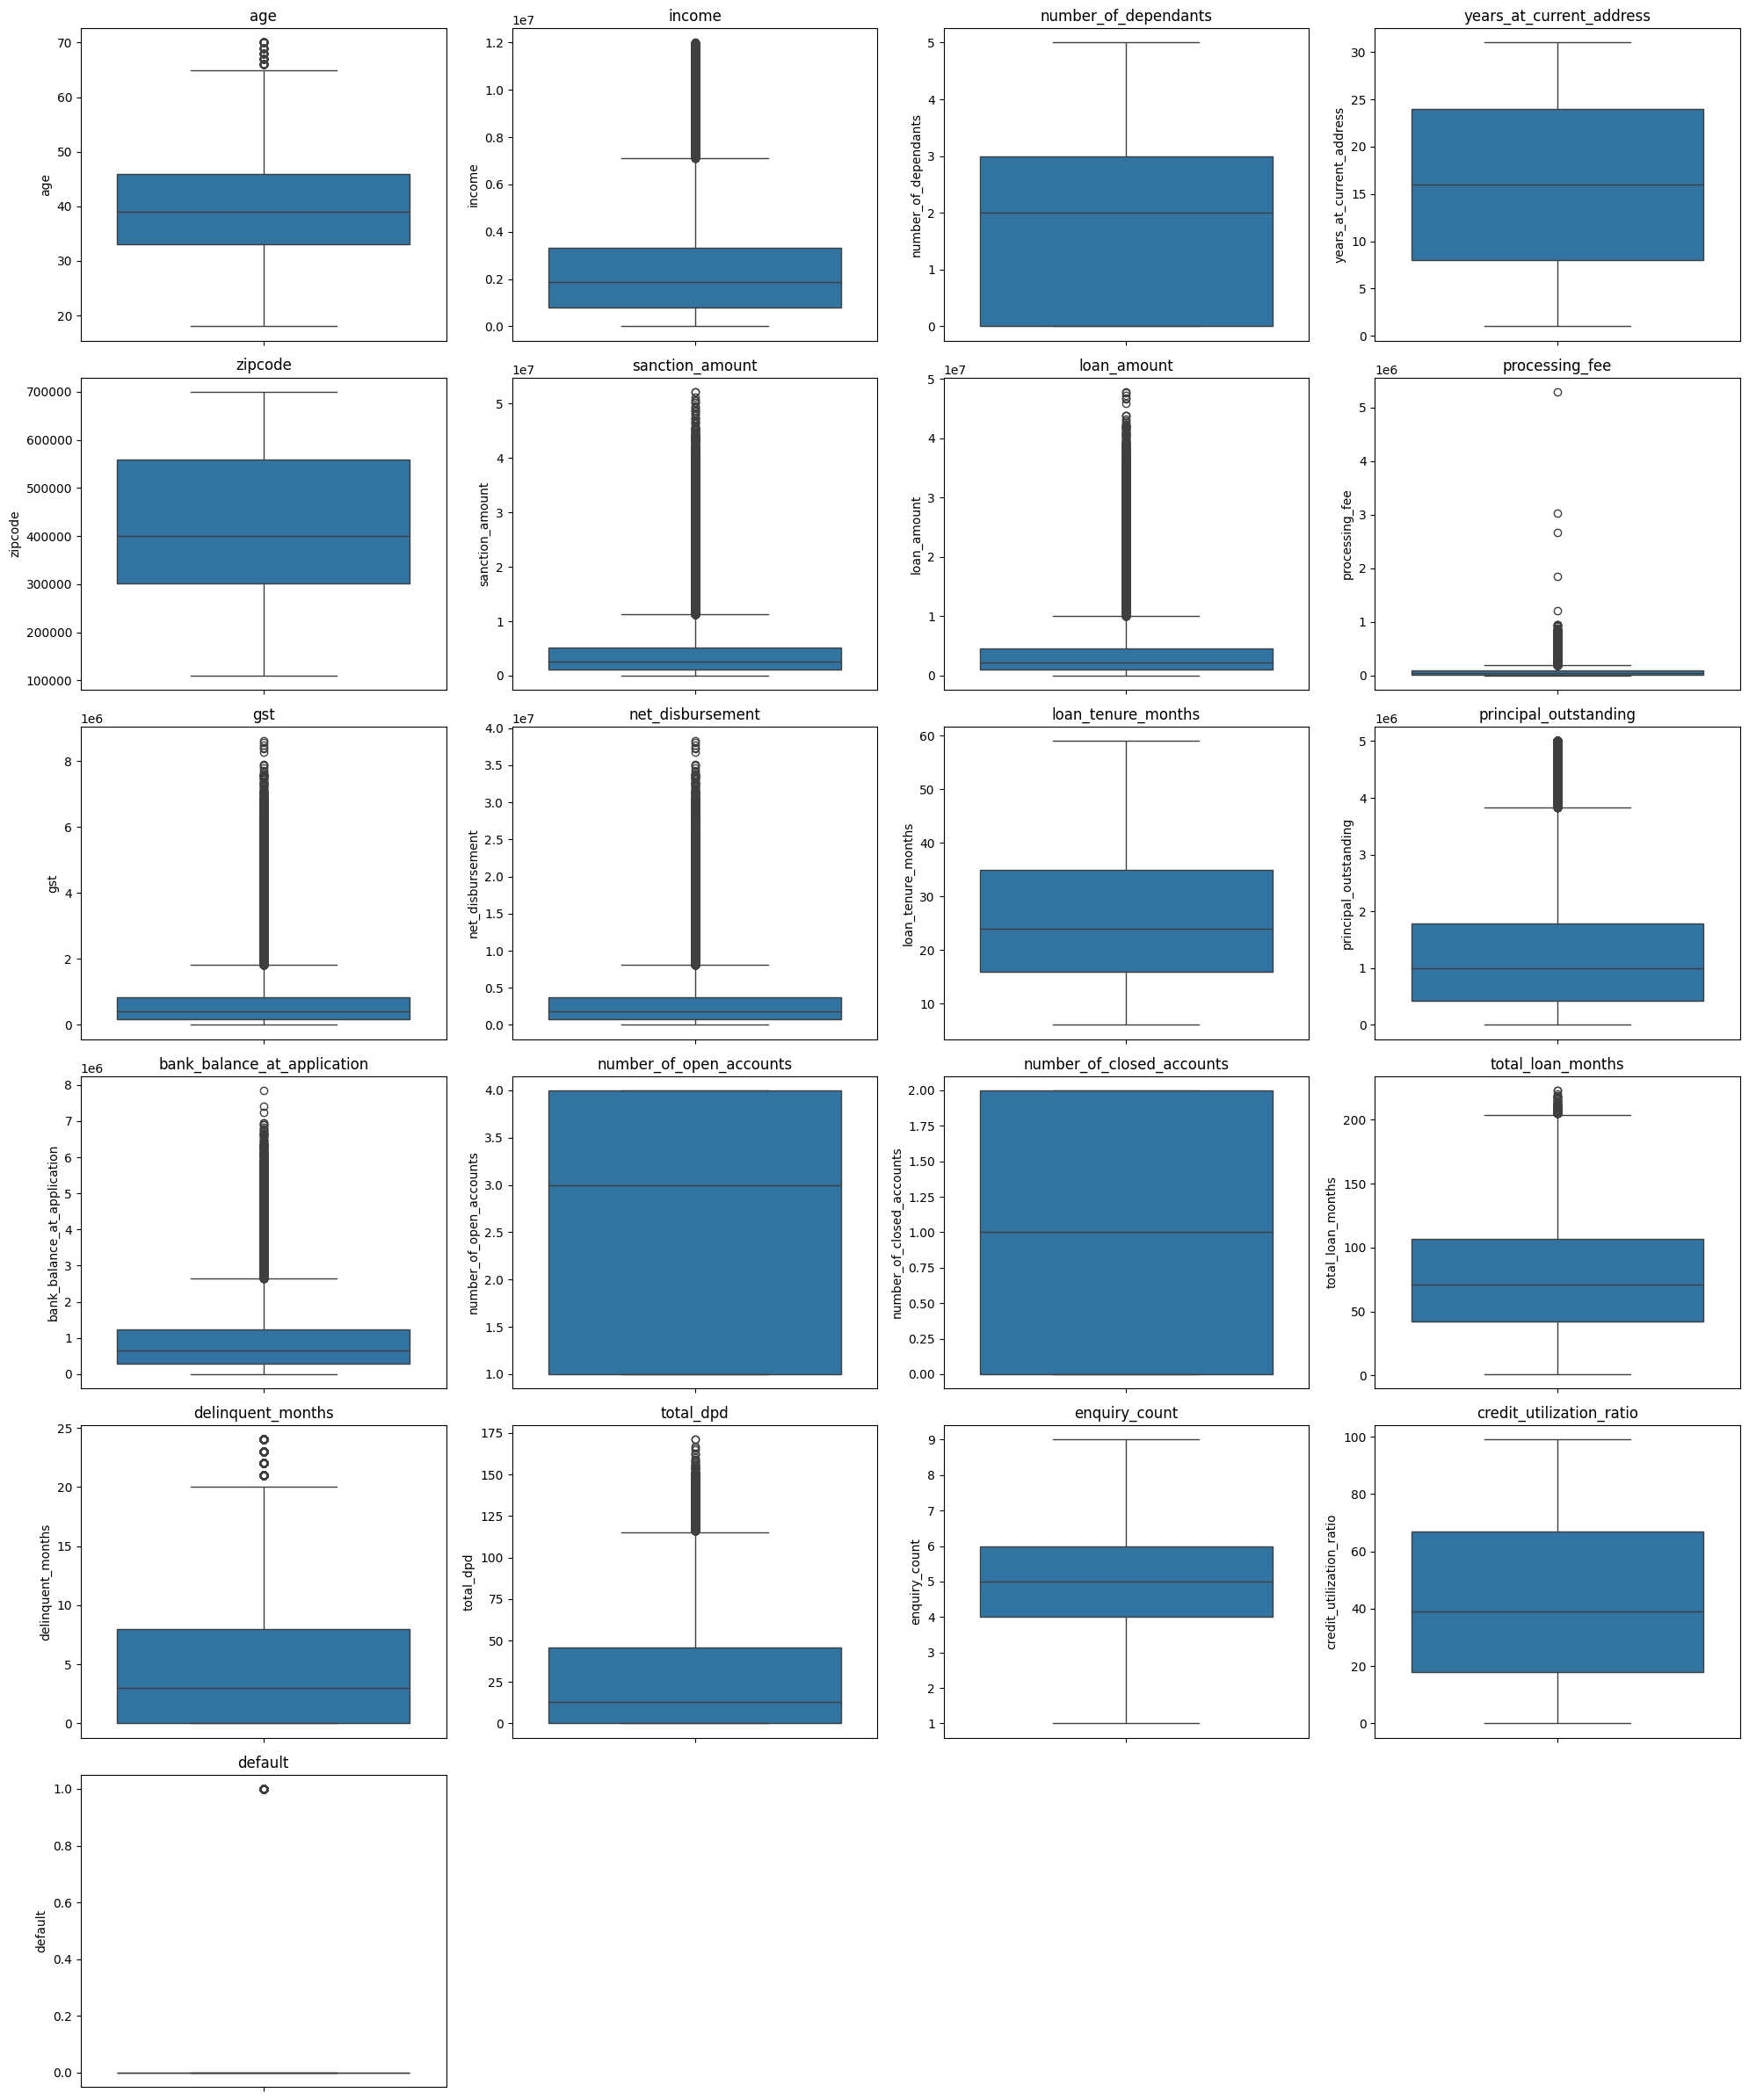

In [24]:
# Setup layout
import math

# Get number of plots and calculate rows needed
num_plots = len(numeric_cols_train)
cols_per_row = 4
rows = math.ceil(num_plots / cols_per_row)

# Set figure size
plt.figure(figsize=(cols_per_row * 5, rows * 4))  # Adjust figure size as needed

# Loop through each numeric column and create boxplot
# Plot each boxplot using seaborn
for i, col in enumerate(numeric_cols_train, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(data=df_train, y=col)
    plt.title(col)

plt.tight_layout()
plt.show()

In [25]:
# Histogram to see the distribution

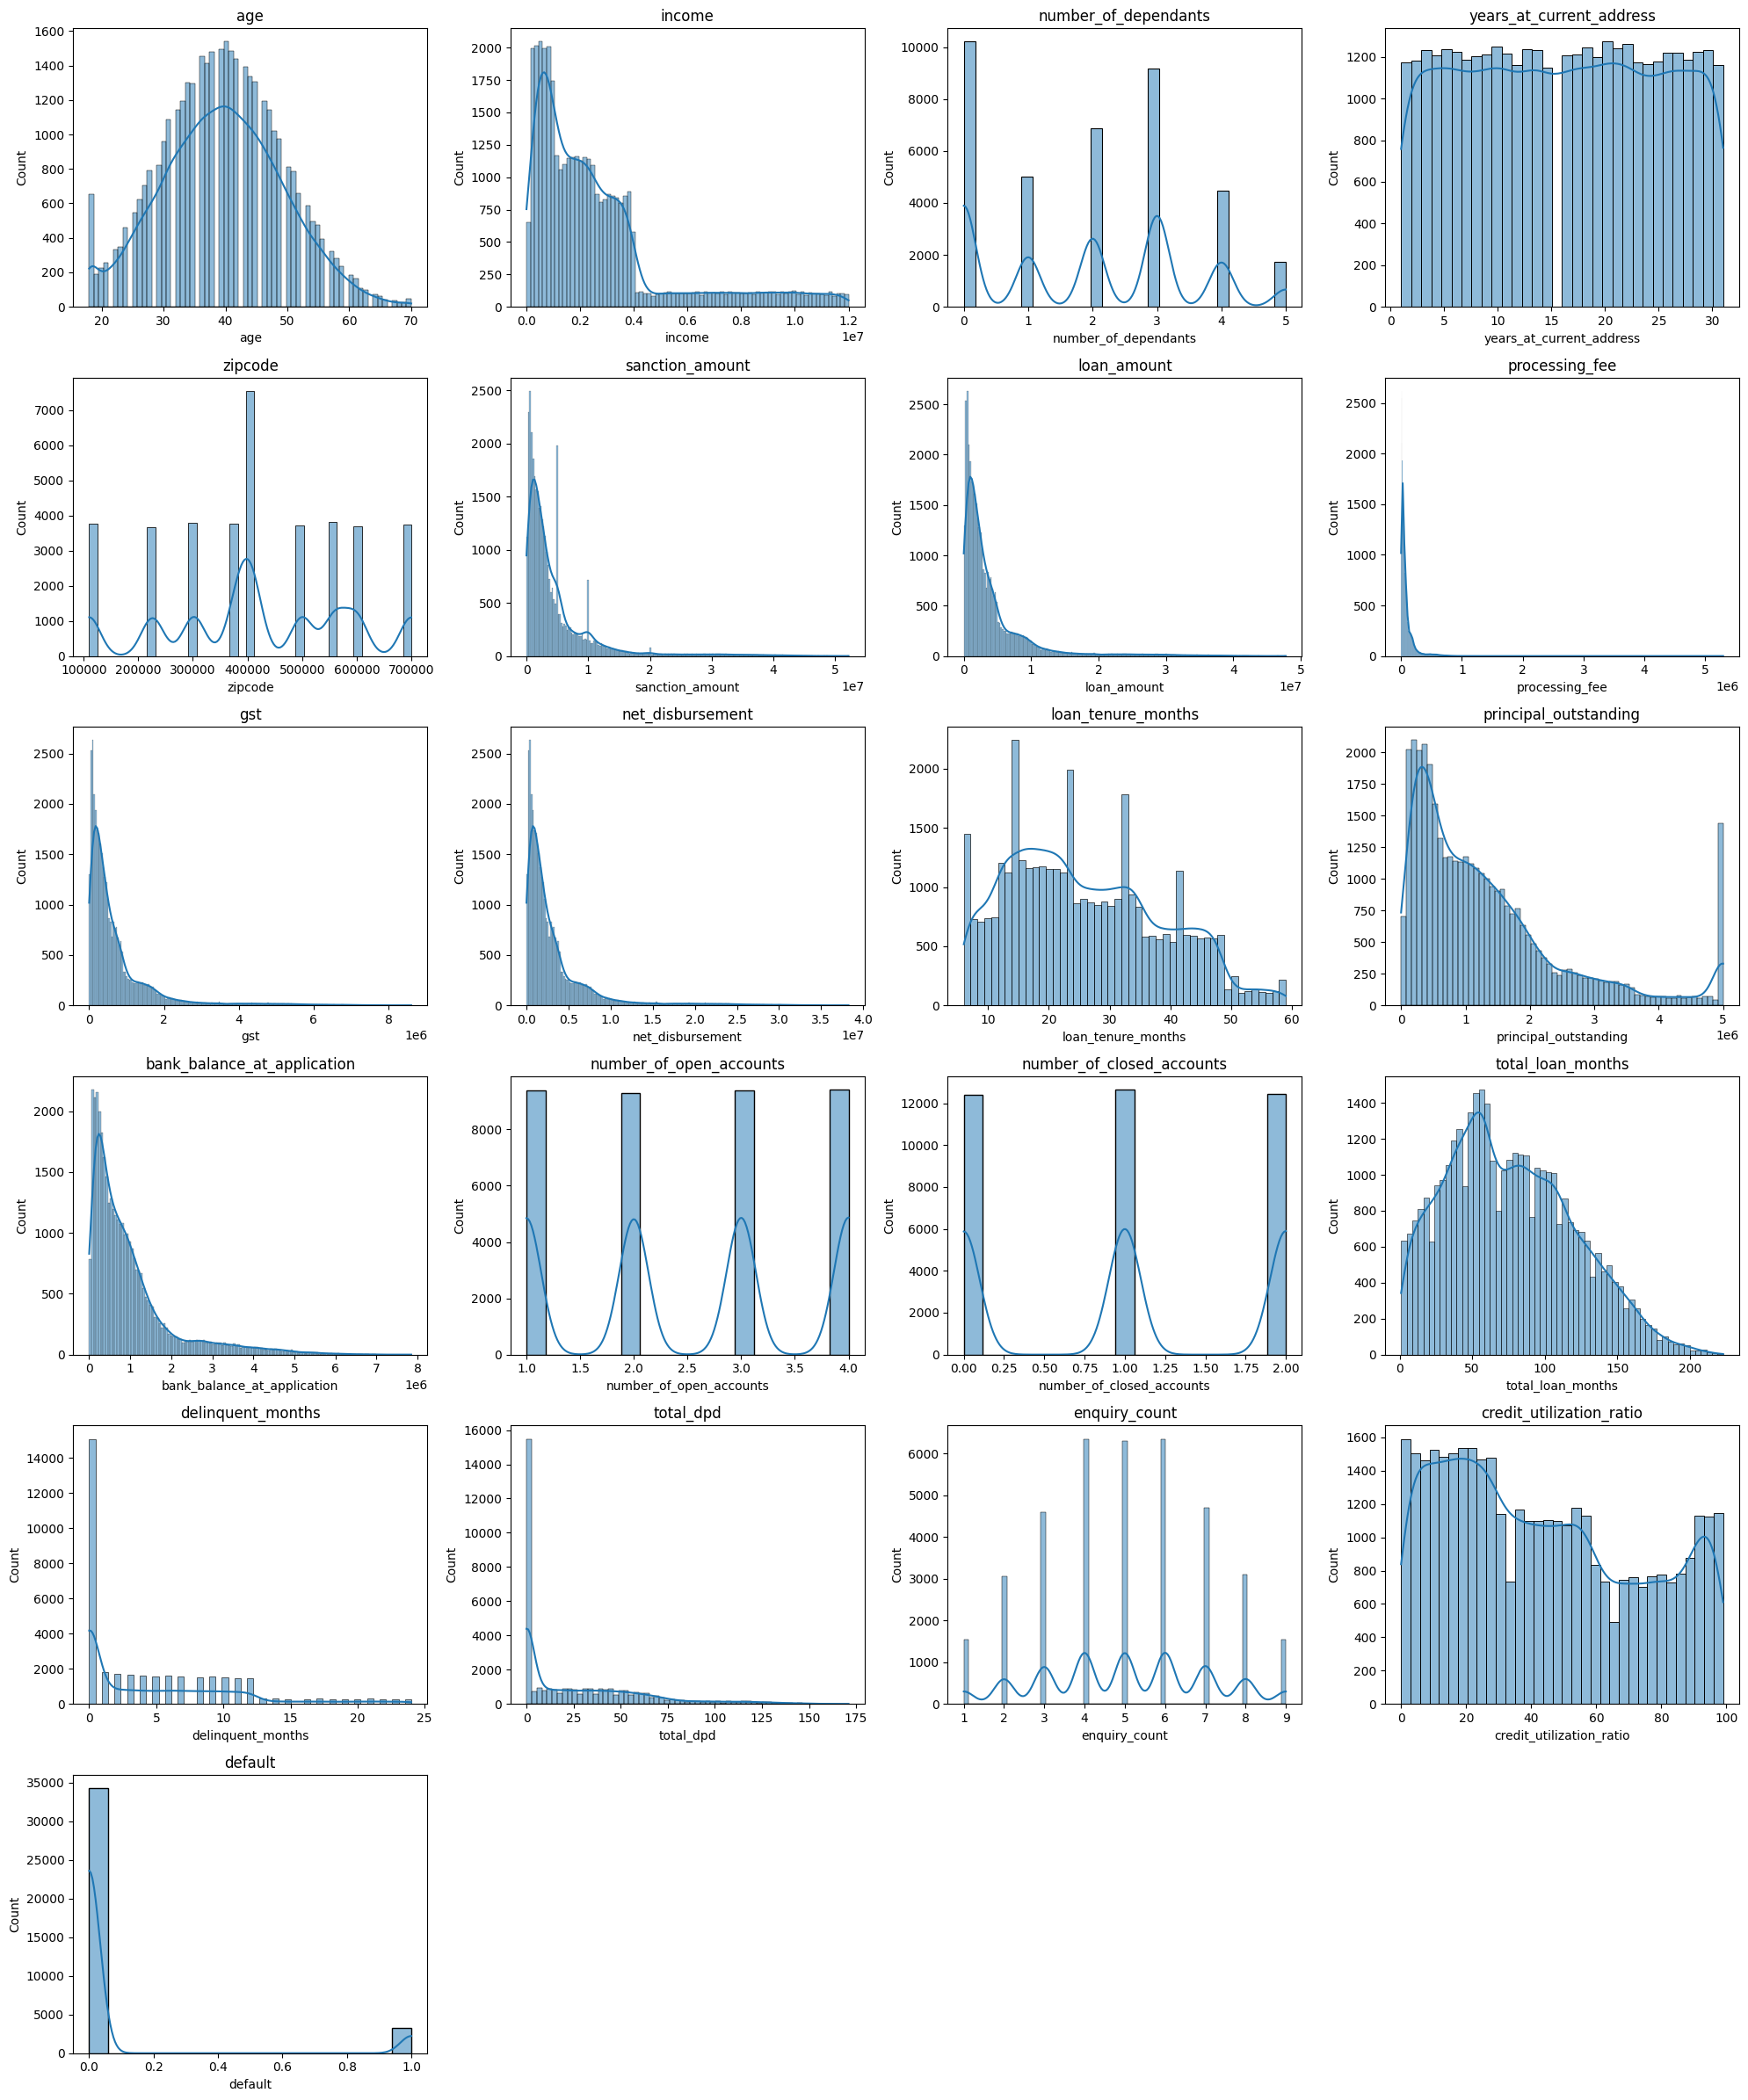

In [26]:
# Get number of plots and calculate rows needed
# Calculate number of plots and rows
num_plots = len(numeric_cols_train)
cols_per_row = 4
rows = math.ceil(num_plots / cols_per_row)

# Set figure size
plt.figure(figsize=(cols_per_row * 5, rows * 4))

# Loop to plot histograms vertically
for i, col in enumerate(numeric_cols_train, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(data=df_train, x=col, kde=True)  # Changed to x=col
    plt.title(col)

plt.tight_layout()
plt.show()

In [27]:
# Processing fees is tight to one end of the distribution and at other end

df_train.processing_fee.describe()

count     37500.00
mean      80290.68
std      113128.14
min           0.00
25%       19220.00
50%       44600.00
75%       92420.00
max     5293543.52
Name: processing_fee, dtype: float64

## Check the outliers processing_fee columns
## Business rule (processing/loan_amount) ratio > 3% should be filtered

In [28]:
df_train[(df_train['processing_fee']/df_train['loan_amount'])>0.03][['loan_amount','processing_fee']]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


In [29]:
df_test[(df_test['processing_fee']/df_test['loan_amount'])>0.03][['loan_amount','processing_fee']]

,loan_amount,processing_fee
33705,3812000,5678020.86
12294,4639000,5698029.90


In [30]:
# Filter these records and store to new train dataset 
df_train_1 = df_train[(df_train['processing_fee']/df_train['loan_amount'])<0.03].copy()

In [31]:
# Apply the same concept to test datasets 

df_test_1 = df_test[(df_test['processing_fee']/df_test['loan_amount'])<0.03].copy()

In [32]:
df_train_1.shape, df_test_1.shape

((37488, 33), (12497, 33))

### Analyse & Clean categorical columns 

In [33]:
for col in categorical_cols_train:
    print(col, "-->",df_train_1[col].unique())

cust_id --> ['C12747' 'C32496' 'C43676' ... 'C45237' 'C49229' 'C37785']
gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state --> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
loan_id --> ['L12747' 'L32496' 'L43676' ... 'L45237' 'L49229' 'L37785']
loan_purpose --> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
disbursal_date --> ['2020-10-31' '2022-10-22' '2023-12-04' ... '2022-02-07' '2019-10-30'
 '2022-10-04']
installment_start_dt --> ['2020-11-11' '2022-10-27' '2023-12-29' ... '2024-08-19' '2019-07-28'
 '2019-07-25']


In [34]:
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal', 'Personal')
df_test_1['loan_purpose'] = df_test_1['loan_purpose'].replace('Personaal', 'Personal')

In [35]:
# Check the changes 
print(f"Check the train dataset Loan purpose column: {df_train_1['loan_purpose'].unique()}")
print(f"Check the test dataset Loan purpose column:{df_test_1['loan_purpose'].unique()}")

Check the train dataset Loan purpose column: ['Home' 'Education' 'Personal' 'Auto']
Check the test dataset Loan purpose column:['Home' 'Education' 'Auto' 'Personal']


### Exploratory Data Analysis

In [36]:
numeric_cols_train

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'zipcode',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio',
 'default']

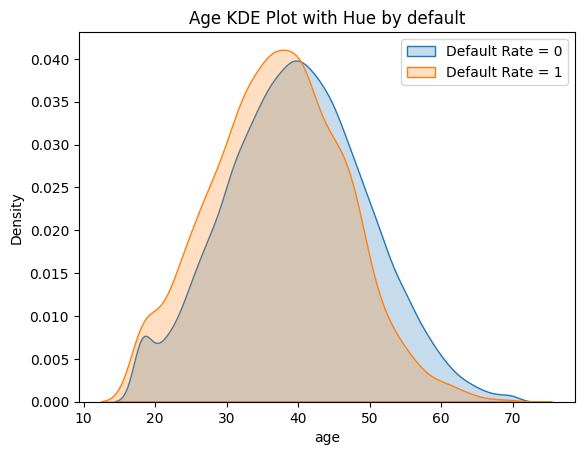

In [37]:
# Conduct Bivariate Analysis using Kde plot to see the distribution of default rate with age 

sns.kdeplot(df_train_1[df_train_1['default']==0]['age'], fill=True, label='Default Rate = 0')
sns.kdeplot(df_train_1[df_train_1['default']==1]['age'], fill=True, label='Default Rate = 1')
plt.title(f"Age KDE Plot with Hue by default")
plt.legend()
plt.show()

Insights 

1) Orange graph is little bit shifted to the left of blue graph which indicates that people with young age are more likely to default. 

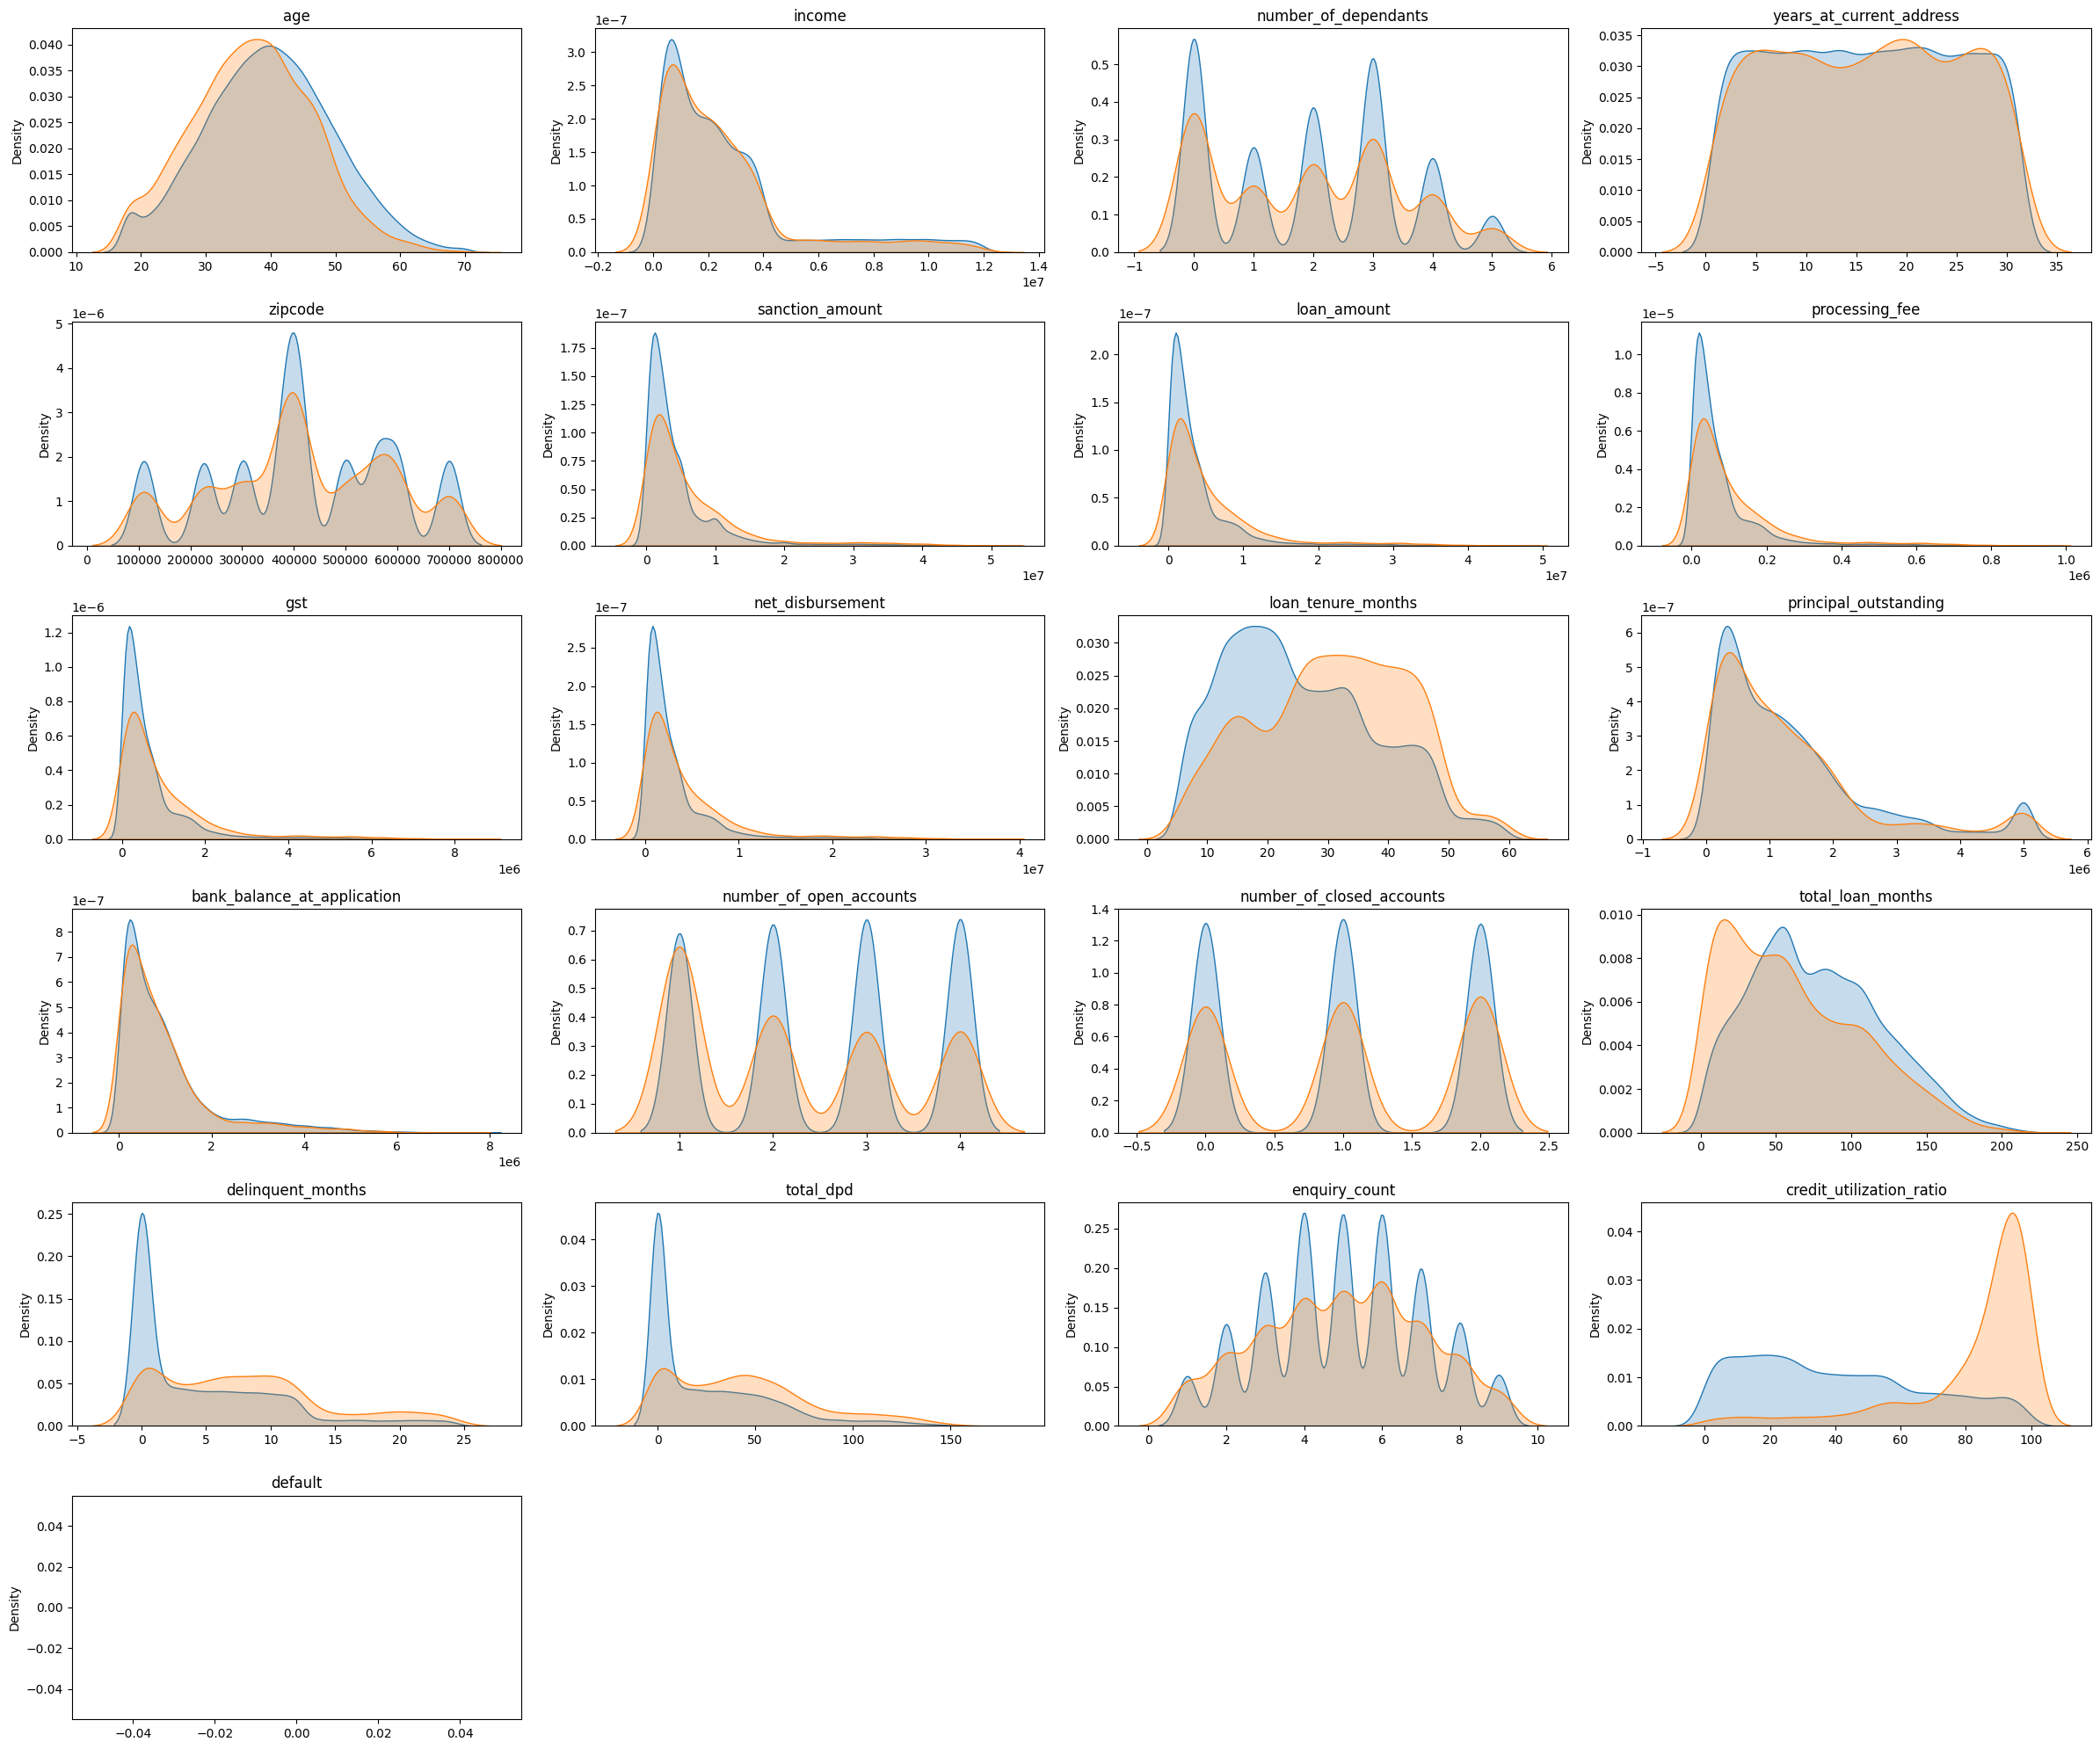

In [38]:
# Analyse the charts for all contineous column in one graph to see the distribution 

plt.figure(figsize=(24,20)) 

for i, col in enumerate(numeric_cols_train):
    plt.subplot(6,4,i+1)
    sns.kdeplot(df_train_1[col][df_train_1['default']==0],fill=True,label='default=0')
    sns.kdeplot(df_train_1[col][df_train_1['default']==1],fill=True,label='default=1')
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

Insights

1) Credit Utilization ratio , Age and Loan_tenure_months are the strongest factor for default analysing the credit risk dataset

In [39]:
### Feature Engineering 

In [40]:
# Create new column LTIR for train and test dataset
df_train_1['Loan_to_income_Ratio'] = round(df_train_1['loan_amount']/df_train_1['income'],2)
df_train_1['Loan_to_income_Ratio'].describe()

count   37488.00
mean        1.56
std         0.97
min         0.30
25%         0.77
50%         1.16
75%         2.46
max         4.57
Name: Loan_to_income_Ratio, dtype: float64

In [41]:
df_test_1['Loan_to_income_Ratio'] = round(df_test_1['loan_amount']/df_test_1['income'],2)
df_test_1['Loan_to_income_Ratio'].describe()

count   12497.00
mean        1.55
std         0.97
min         0.30
25%         0.78
50%         1.16
75%         2.43
max         4.59
Name: Loan_to_income_Ratio, dtype: float64

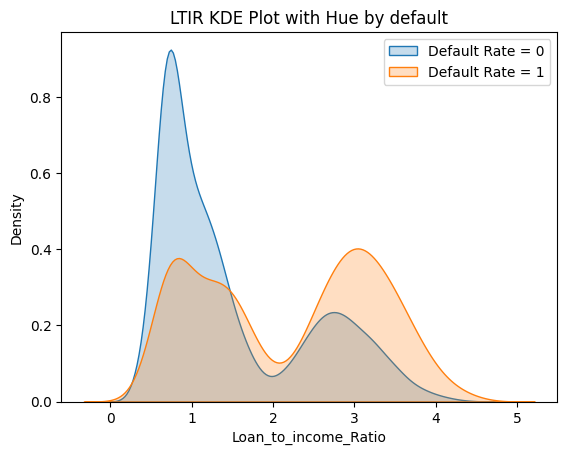

In [42]:
#Analyse using hist plot 

sns.kdeplot(df_train_1[df_train_1['default']==0]['Loan_to_income_Ratio'], fill=True, label='Default Rate = 0')
sns.kdeplot(df_train_1[df_train_1['default']==1]['Loan_to_income_Ratio'], fill=True, label='Default Rate = 1')
plt.title(f"LTIR KDE Plot with Hue by default")
plt.legend()
plt.show()

In [43]:
# Calcuate Delinquency ration per based on delinquent months and total_loan_months 

df_train_1['delinquency_ratio'] = (df_train_1['delinquent_months']*100/df_train_1['total_loan_months'])
df_train_1[['delinquent_months','total_loan_months', 'delinquency_ratio']].head(5)

,delinquent_months,total_loan_months,delinquency_ratio
12746,20,152,13.16
32495,10,160,6.25
43675,12,54,22.22
9040,0,76,0.00
13077,0,60,0.00


In [44]:
df_test_1['delinquency_ratio'] = (df_test_1['delinquent_months']*100/df_test_1['total_loan_months'])
df_test_1[['delinquent_months','total_loan_months', 'delinquency_ratio']].head(5)

,delinquent_months,total_loan_months,delinquency_ratio
19205,0,42,0.00
15514,0,125,0.00
30367,0,76,0.00
35347,3,125,2.40
41814,14,131,10.69


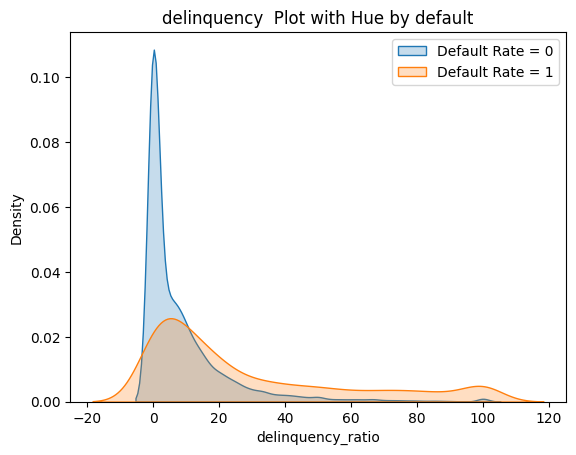

In [45]:
# Plot Kde plot for Delinquent months 

sns.kdeplot(df_train_1[df_train_1['default']==0]['delinquency_ratio'], fill=True, label='Default Rate = 0')
sns.kdeplot(df_train_1[df_train_1['default']==1]['delinquency_ratio'], fill=True, label='Default Rate = 1')
plt.title(f"delinquency  Plot with Hue by default")
plt.legend()
plt.show()

In [46]:
# Calculate Average Delinquency Ratio 

df_train_1['avg_dpd_per_delinquency'] = np.where(
    df_train_1['delinquent_months']!=0,
    (df_train_1['total_dpd']/df_train_1['delinquent_months']).round(1),
    0
) 
df_train_1['avg_dpd_per_delinquency'].isna().sum()

np.int64(0)

In [47]:
df_test_1['avg_dpd_per_delinquency'] = np.where(
    df_test_1['delinquent_months']!=0,
    (df_test_1['total_dpd']/df_test_1['delinquent_months']).round(1),
    0
)
df_test_1['avg_dpd_per_delinquency'].isna().sum()


np.int64(0)

In [48]:
df_test_1

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,Loan_to_income_Ratio,delinquency_ratio,avg_dpd_per_delinquency
19205,C19206,36,M,Married,Self-Employed,3728000,3,Owned,24,Jaipur,...,1,42,0,0,5,98,0,2.65,0.00,0.00
15514,C15515,43,F,Single,Self-Employed,2493000,0,Owned,23,Delhi,...,0,125,0,0,5,32,0,1.24,0.00,0.00
30367,C30368,30,M,Married,Self-Employed,3114000,4,Owned,27,Delhi,...,0,76,0,0,6,82,0,1.07,0.00,0.00
35347,C35348,37,F,Single,Salaried,570000,2,Owned,5,Pune,...,2,125,3,21,7,48,0,2.74,2.40,7.00
41814,C41815,48,F,Single,Salaried,662000,0,Mortgage,23,Chennai,...,1,131,14,89,8,97,1,2.04,10.69,6.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29297,C29298,27,M,Single,Self-Employed,185000,0,Owned,3,Jaipur,...,0,104,5,14,8,52,0,1.37,4.81,2.80
20567,C20568,40,M,Single,Self-Employed,430000,0,Rented,19,Kolkata,...,1,10,0,0,5,5,0,3.17,0.00,0.00
681,C00682,28,M,Married,Self-Employed,11961000,5,Rented,15,Bangalore,...,2,32,2,7,4,54,0,0.31,6.25,3.50
33682,C33683,31,M,Single,Salaried,3430000,1,Owned,29,Delhi,...,0,36,0,0,4,85,0,3.65,0.00,0.00


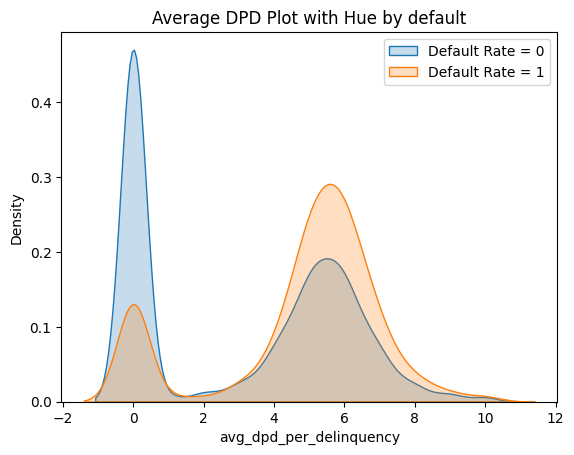

In [49]:
#Plot Kde chart to visualize the insights  

sns.kdeplot(df_train_1[df_train_1['default']==0]['avg_dpd_per_delinquency'], fill=True, label='Default Rate = 0')
sns.kdeplot(df_train_1[df_train_1['default']==1]['avg_dpd_per_delinquency'], fill=True, label='Default Rate = 1')
plt.title(f"Average DPD Plot with Hue by default")
plt.legend()
plt.show()

### Feature Selections  
### Select the relevant for model prediction

In [50]:
df_train_2 = df_train_1.drop(["cust_id", "loan_id","zipcode"], axis=1)

In [51]:
print(df_train_2.columns)

Index(['age', 'gender', 'marital_status', 'employment_status', 'income', 'number_of_dependants', 'residence_type', 'years_at_current_address', 'city', 'state', 'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months', 'principal_outstanding', 'bank_balance_at_application', 'disbursal_date', 'installment_start_dt', 'number_of_open_accounts', 'number_of_closed_accounts', 'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default', 'Loan_to_income_Ratio', 'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype='object')


In [52]:
df_test_1 = df_test_1.drop(["cust_id", "loan_id", "zipcode"], axis=1)

In [53]:
#Drop unwanted columns as per business requirements

In [54]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 'total_loan_months','delinquent_months', 'total_dpd'], axis=1)

In [55]:
df_test_1 = df_test_1.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 'total_loan_months','delinquent_months', 'total_dpd'], axis=1)

# Calculate VIF to check multicollinearity in dataset for train & test

# Train VIF

In [56]:
df_train_3.select_dtypes(['int64','float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'sanction_amount', 'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months', 'principal_outstanding', 'bank_balance_at_application', 'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count', 'credit_utilization_ratio', 'default', 'Loan_to_income_Ratio', 'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype='object')

In [57]:
df_test_1.select_dtypes(['int64','float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'sanction_amount', 'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months', 'principal_outstanding', 'bank_balance_at_application', 'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count', 'credit_utilization_ratio', 'default', 'Loan_to_income_Ratio', 'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype='object')

In [58]:
X_train = df_train_3.drop('default', axis=1)
y_train = df_train_3['default']

from sklearn.preprocessing import MinMaxScaler 

cols_to_scale = X_train.select_dtypes(["int64" , "float64"]).columns

scaler = MinMaxScaler()


In [59]:
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,Loan_to_income_Ratio,delinquency_ratio,avg_dpd_per_delinquency
count,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00
mean,0.41,0.39,0.50,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.40,0.40,0.50,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.67,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.10,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.62,0.68,0.51,0.13,0.57
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [60]:
X_test = df_test_1.drop('default', axis=1)
y_test = df_test_1['default']


X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,Loan_to_income_Ratio,delinquency_ratio,avg_dpd_per_delinquency
count,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00
mean,0.42,0.38,0.50,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.11,0.33
std,0.19,0.31,0.30,0.12,0.11,0.11,0.11,0.23,0.25,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.05,0.05,0.05,0.05,0.34,0.20,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.44
75%,0.54,0.60,0.77,0.10,0.09,0.09,0.09,0.55,0.36,0.16,0.67,1.00,0.62,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,0.98,0.96,0.96,0.96,1.00,1.00,0.94,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns 
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [62]:
calculate_vif(X_train[cols_to_scale])

,Column,VIF
0,age,5.55
1,number_of_dependants,2.72
2,years_at_current_address,3.36
3,sanction_amount,101.08
4,processing_fee,inf
5,gst,inf
6,net_disbursement,inf
7,loan_tenure_months,6.17
8,principal_outstanding,16.32
9,bank_balance_at_application,9.33


In [63]:
features_to_drop_vif = ['sanction_amount', 'processing_fee' , 'gst', 'net_disbursement', 'principal_outstanding']
X_train_1 = X_train.drop(features_to_drop_vif, axis= 1)
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns 
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'loan_tenure_months', 'bank_balance_at_application', 'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count', 'credit_utilization_ratio', 'Loan_to_income_Ratio', 'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype='object')

In [64]:
vif_train_df = calculate_vif(X_train_1[numeric_columns])

In [65]:
selected_numeric_features_vif = vif_train_df.Column.values 
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio',
       'Loan_to_income_Ratio', 'delinquency_ratio',
       'avg_dpd_per_delinquency'], dtype=object)

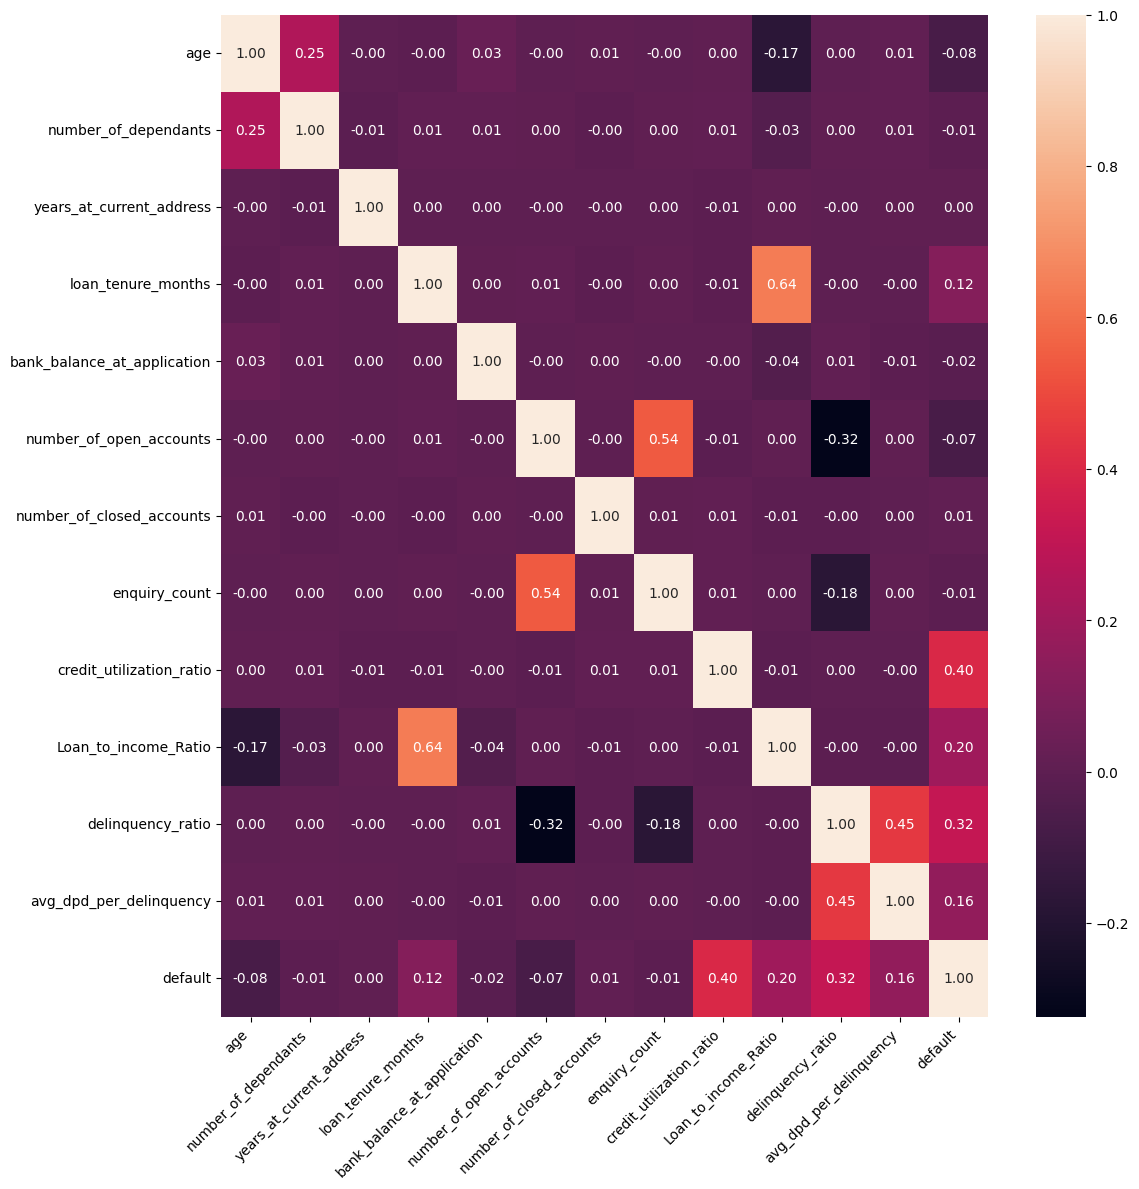

In [66]:
plt.figure(figsize=(12,12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm,annot=True,fmt='0.2f')
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Test VIF

In [67]:
calculate_vif(X_test[cols_to_scale])

,Column,VIF
0,age,5.68
1,number_of_dependants,2.71
2,years_at_current_address,3.38
3,sanction_amount,102.43
4,processing_fee,inf
5,gst,inf
6,net_disbursement,inf
7,loan_tenure_months,5.99
8,principal_outstanding,16.04
9,bank_balance_at_application,9.09


In [68]:
features_to_drop_vif = ['sanction_amount', 'processing_fee' , 'gst', 'net_disbursement', 'principal_outstanding']
X_test_1 = X_test.drop(features_to_drop_vif, axis= 1)
numeric_columns = X_test_1.select_dtypes(['int64', 'float64']).columns 
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'loan_tenure_months', 'bank_balance_at_application', 'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count', 'credit_utilization_ratio', 'Loan_to_income_Ratio', 'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype='object')

In [69]:
calculate_vif(X_test_1[numeric_columns])

,Column,VIF
0,age,5.40
1,number_of_dependants,2.70
2,years_at_current_address,3.36
3,loan_tenure_months,5.84
4,bank_balance_at_application,1.79
5,number_of_open_accounts,4.26
6,number_of_closed_accounts,2.34
7,enquiry_count,6.24
8,credit_utilization_ratio,2.88
9,Loan_to_income_Ratio,4.41


## Selection of columns for Categorical columns

In [70]:
drop_cols = ['cust_id', 'disbursal_date', 'installment_start_dt']

In [71]:
columns_categorical = [col for col in categorical_cols_train if col not in drop_cols]
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'loan_id',
 'loan_purpose',
 'loan_type']

# Weight of Evidence(WOE) & Informative Value (IV)

In [ ]:
def caculate_woe_iv(df,feature,target):
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    ##Get the default and label as good and if not defaulted label as bad for prediction purpose
    grouped = grouped.rename(columns={'count': 'total' , 'sum' : 'good'})
    grouped['bad'] = grouped['total'] - grouped['good']
    total_good = grouped['good'].sum() 
    total_bad = grouped['bad'].sum() 
    grouped['good_pct'] = grouped['good']/total_good 
    grouped['bad_pct'] = grouped['bad']/total_bad
    grouped ['woe'] = np.log(grouped['good_pct']/grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] - grouped['bad_pct'])*grouped['woe']
    #Handle 0 value  
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf],0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf],0)
    total_iv = grouped['iv'].sum() 
    # return woe df and information value for given features
    return grouped, total_iv

In [79]:
grouped, total_iv = caculate_woe_iv(pd.concat([X_train_1, y_train], axis=1), 'loan_purpose' , 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.10,0.21,-0.72,0.08
Education,5620,559,5061,0.17,0.15,0.16,0.00
Home,11304,1734,9570,0.54,0.28,0.66,0.17
Personal,13117,603,12514,0.19,0.37,-0.67,0.12


In [86]:
# Calculate Woe and IV for all columns  

iv_value = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = caculate_woe_iv(pd.concat([X_train_1, y_train], axis=1), feature, 'default')
    else: 
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        _, iv = caculate_woe_iv(pd.concat([X_binned,y_train],axis=1), feature, 'default')
    iv_value[feature] = iv

iv_value

{'age': np.float64(0.0890689462679479),
 'gender': np.float64(0.00047449502170914947),
 'marital_status': np.float64(0.001129766845390142),
 'employment_status': np.float64(0.003953046301722585),
 'number_of_dependants': np.float64(0.0019380899135053508),
 'residence_type': np.float64(0.246745268718145),
 'years_at_current_address': np.float64(0.0020800513608156363),
 'city': np.float64(0.0019059578709781529),
 'state': np.float64(0.0019005589806779287),
 'loan_purpose': np.float64(0.3691197842282755),
 'loan_type': np.float64(0.16319324904149224),
 'loan_tenure_months': np.float64(0.21893515090196278),
 'bank_balance_at_application': np.float64(0.0063187993277516365),
 'number_of_open_accounts': np.float64(0.08463134083005877),
 'number_of_closed_accounts': np.float64(0.0011964272592421567),
 'enquiry_count': np.float64(0.007864214085342608),
 'credit_utilization_ratio': np.float64(2.352965568168245),
 'Loan_to_income_Ratio': np.float64(0.476415456948364),
 'delinquency_ratio': np.flo

In [87]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

iv_df = pd.DataFrame(list(iv_value.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV',ascending=False)
iv_df

,Feature,IV
16,credit_utilization_ratio,2.353
18,delinquency_ratio,0.717
17,Loan_to_income_Ratio,0.476
19,avg_dpd_per_delinquency,0.402
9,loan_purpose,0.369
5,residence_type,0.247
11,loan_tenure_months,0.219
10,loan_type,0.163
0,age,0.089
13,number_of_open_accounts,0.085


# Feature Selection using IV

In [88]:
selected_features_iv = [feature for feature, iv in iv_value.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'Loan_to_income_Ratio',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

# Feature Encoding 

In [91]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test_1[selected_features_iv]

In [99]:
# Create dummies encoding 

X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)

In [100]:
X_train_encoded.head(5)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,Loan_to_income_Ratio,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788,0.415,1.000,0.364,0.415,0.132,0.590,True,False,False,True,False,False
32495,0.500,0.830,0.667,0.051,0.307,0.062,0.620,True,False,True,False,False,False
43675,0.385,0.491,0.000,0.000,0.759,0.222,0.560,False,False,False,True,False,False
9040,0.462,0.642,0.667,0.879,0.194,0.000,0.000,False,False,True,False,False,False
13077,0.769,0.170,0.000,0.717,0.047,0.000,0.000,True,False,False,False,True,True


# Model Training 

Attemp 1  

1. Logistic Regression, RandomForest & XGB 
2. No handling of class imbalance 

In [103]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report 

In [108]:
model = LogisticRegression()
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



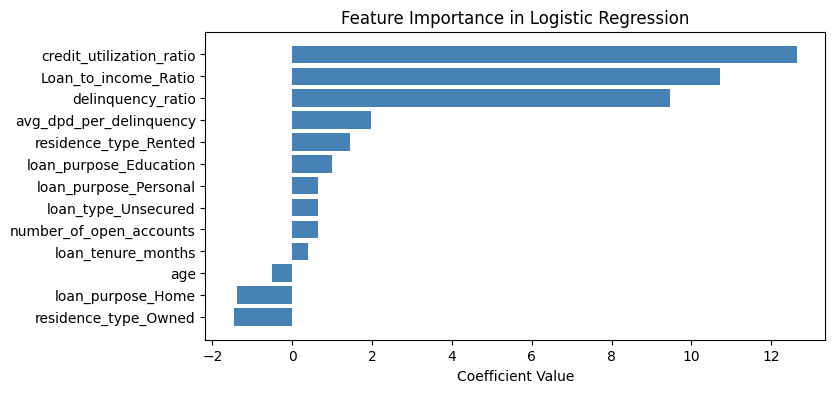

In [109]:
feature_importance = model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

Logistic regression recall is just 72% whereas business expected it to be 90% . Business wants to capture more customer who are actually default. Trying Random forest and XGB next

In [106]:
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.86      0.71      0.78      1074

    accuracy                           0.97     12497
   macro avg       0.92      0.85      0.88     12497
weighted avg       0.96      0.97      0.96     12497



In [110]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.76      0.79      1074

    accuracy                           0.97     12497
   macro avg       0.90      0.87      0.89     12497
weighted avg       0.96      0.97      0.97     12497



# Model hasn't output as required by business, Trying UnderSampling and OverSampling Technique for feature imbalances

#### RandomizedSearch CV for Attempt 1: XGBoost

In [111]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7883492091651491
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.77      0.83      0.80      1074

    accuracy                           0.96     12497
   macro avg       0.88      0.90      0.89     12497
weighted avg       0.97      0.96      0.96     12497



### Attempt 2

1. Logistic Regression & XGB
1. Handle Class Imbalance Using Under Sampling

In [113]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train_encoded, y_train)
y_train_res.value_counts()

default
0    3223
1    3223
Name: count, dtype: int64

In [114]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.96      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



In [115]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.99      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.95      0.81     12497
weighted avg       0.96      0.92      0.93     12497



### Attempt 3

1. Logistic Regression
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [116]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train_encoded, y_train)
y_train_smt.value_counts()

default
0    34194
1    34194
Name: count, dtype: int64

In [117]:
model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.55      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497

